## Structure
1. EDA
2. Supervised models (random forest, trees decisions, k-neighbors, regression)
3. Unsupervised models (clustering)
4. NLP for essays
---

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#For NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import re
from collections import Counter

### SECTION 1
---

In [91]:
data = pd.read_csv('profiles.csv')
data.dropna(inplace=True)

# nltk.download('punkt')
# nltk.download('stopwords')

# print(data.head())
# print(data.info())
print(data.columns)

warnings.filterwarnings('ignore')

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [92]:
mean_age = data['age'].mean()
print(mean_age)

33.65622872702519


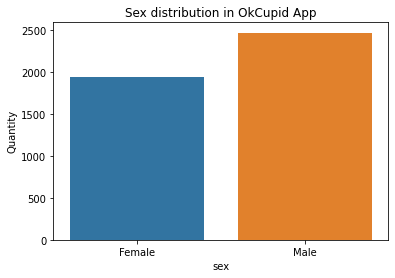

<Figure size 432x288 with 0 Axes>

In [93]:
sex_data = data.groupby("sex").sex.count()

sns.barplot(["Female", "Male"], [sex_data["f"], sex_data["m"]])
plt.title("Sex distribution in OkCupid App")
plt.xlabel("sex")
plt.ylabel("Quantity")
plt.show()
plt.clf()

body_type
average           1207
fit                906
athletic           799
curvy              448
thin               348
a little extra     322
skinny             125
full figured       102
overweight          60
jacked              40
used up             40
rather not say      10
Name: body_type, dtype: int64


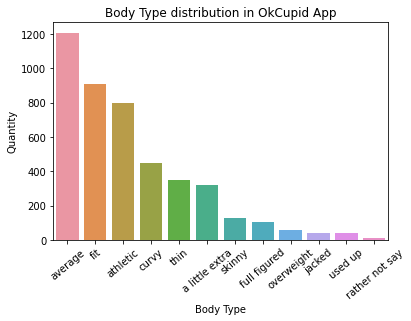

<Figure size 432x288 with 0 Axes>

In [94]:
# body_type, diet, drinks, drugs and education

body_type = data.groupby("body_type").body_type.count()
body_type.sort_values(ascending=False, inplace=True)
print(body_type)

# this works too
# sns.barplot(body_type.index.tolist(), body_type)
# plt.show()
# plt.clf()

sns.barplot(body_type.index.values, body_type.values)
plt.xticks(rotation=40)
plt.xlabel("Body Type")
plt.ylabel("Quantity")
plt.title("Body Type distribution in OkCupid App")
plt.show()
plt.clf()

diet
mostly anything        2257
strictly anything       636
anything                522
mostly vegetarian       441
mostly other            155
strictly vegetarian     125
strictly other           68
vegetarian               45
mostly vegan             41
other                    39
Name: diet, dtype: int64


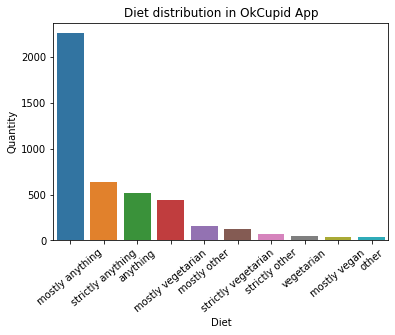

<Figure size 432x288 with 0 Axes>

In [95]:
diet = data.groupby("diet").diet.count()
diet.sort_values(ascending=False, inplace=True)
diet = diet.head(10)
print(diet)

sns.barplot(diet.index.values, diet.values)
plt.xticks(rotation=40)
plt.xlabel("Diet")
plt.ylabel("Quantity")
plt.title("Diet distribution in OkCupid App")
plt.show()
plt.clf()

drinks
socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately      34
Name: drinks, dtype: int64


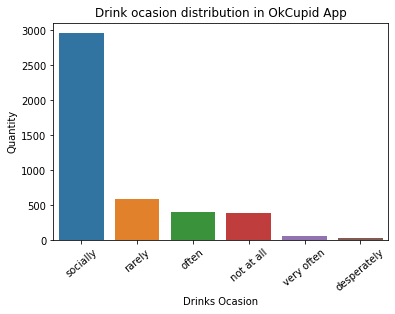

<Figure size 432x288 with 0 Axes>

In [96]:
drinks = data.groupby("drinks").drinks.count()
drinks.sort_values(ascending=False, inplace=True)
print(drinks)

sns.barplot(drinks.index.values, drinks.values)
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

smokes
no                3523
sometimes          305
when drinking      233
yes                200
trying to quit     146
Name: smokes, dtype: int64


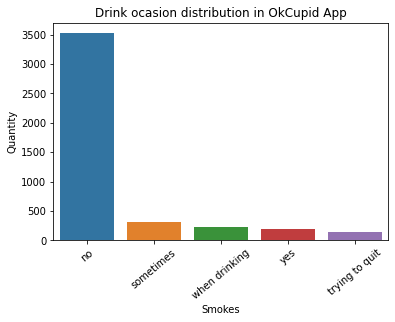

<Figure size 432x288 with 0 Axes>

In [97]:
smokes = data.groupby("smokes").smokes.count()
smokes.sort_values(ascending=False, inplace=True)
print(smokes)

sns.barplot(smokes.index.values, smokes.values)
plt.xticks(rotation=40)
plt.xlabel("Smokes")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

drugs
never        3423
sometimes     916
often          68
Name: drugs, dtype: int64


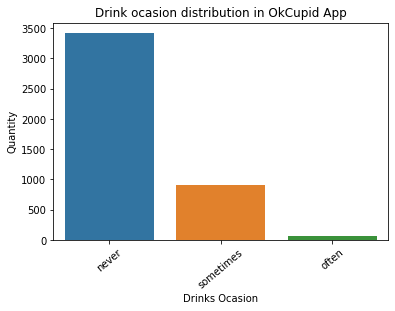

<Figure size 432x288 with 0 Axes>

In [98]:
drugs = data.groupby("drugs").drugs.count()
drugs.sort_values(ascending=False, inplace=True)
print(drugs)

sns.barplot(drugs.index.values, drugs.values)
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

education
graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
working on two-year college           132
working on masters program            128
dropped out of college/university     120
graduated from ph.d program           100
graduated from law school              91
Name: education, dtype: int64


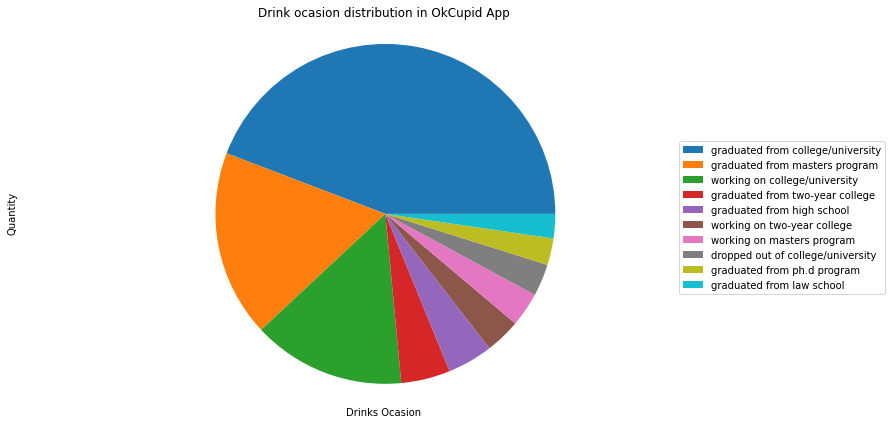

<Figure size 432x288 with 0 Axes>

In [99]:
education = data.groupby("education").education.count()
education.sort_values(ascending=False, inplace=True)
education = education.head(10)
print(education)

plt.figure(figsize=(13, 7))
plt.pie(education.values)
plt.legend(education.index.values, bbox_to_anchor=(.9, .7))
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.axis('equal')
plt.show()
plt.clf()

job
other                             634
student                           460
artistic / musical / writer       414
science / tech / engineering      357
sales / marketing / biz dev       352
medicine / health                 338
computer / hardware / software    336
education / academia              296
executive / management            209
entertainment / media             191
Name: job, dtype: int64


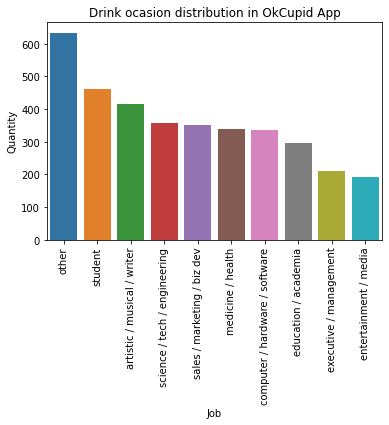

<Figure size 432x288 with 0 Axes>

In [100]:
job = data.groupby("job").job.count()
job.sort_values(ascending=False, inplace=True)
job = job.head(10)
print(job)

sns.barplot(job.index.values, job.values)
plt.xticks(rotation=90)
plt.xlabel("Job")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

### SECTION 2
---

In [101]:
# print(data.columns)
# print(data.offspring.unique())
data_clean = data[['age', 'drinks', 'drugs', 'height', 'income', 'smokes', 'status']]
data_clean["age"] = data_clean["age"].fillna(data_clean["age"].mean())
data_clean["height"] = data_clean["height"].fillna(data_clean["height"].mean())
data_clean.dropna(inplace=True)

def split(lst, category):
    for element in lst:
        data_clean["{0} {1}".format(category, element)] = data_clean["drinks"].apply(lambda x: 1 if x == element else 0)

drinks = data_clean.drinks.unique()
drugs = data_clean.drugs.unique()
smokes = data_clean.smokes.unique()
split(drinks, "drinks")
split(drugs, "drugs")
split(smokes, "smokes")
data_clean.drop(["drinks", "drugs", "smokes"], axis=1, inplace=True)

K-NEAREST NEIGHBORS


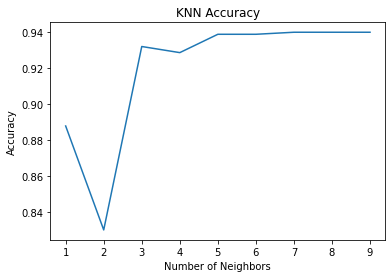

CONFUSION MATRIX
[[  0   0   0  26]
 [  0   0   0   4]
 [  0   0   0  23]
 [  0   0   1 828]]

Score: 0.9387755102040817
 - - - - - - - - - - - - - - - - - - - - - - - - 
CLASSIFICATION REPORT
                precision    recall  f1-score   support

     available       0.00      0.00      0.00        26
       married       0.00      0.00      0.00         4
seeing someone       0.00      0.00      0.00        23
        single       0.94      1.00      0.97       829

      accuracy                           0.94       882
     macro avg       0.23      0.25      0.24       882
  weighted avg       0.88      0.94      0.91       882



<Figure size 432x288 with 0 Axes>

In [102]:
y = data_clean["status"]
X = data_clean.drop("status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("K-NEAREST NEIGHBORS")
neighbors = range(1, 10)
predictions = []
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    predictions.append(score)

plt.plot(neighbors, predictions)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy")
plt.show()
plt.clf()

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions), end="\n\n")
score = knn.score(X_test, y_test)
print("Score:", score)
print(" - - - - - - - - - - - - - - - - - - - - - - - - ")
print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

In [103]:
y = data_clean["status"]
X = data_clean.drop("status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TREE CLASSIFIER")
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions), end="\n\n")
score = tree.score(X_test, y_test)
print("Score:", score)
print(" - - - - - - - - - - - - - - - - - - - - - - - - ")
print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

TREE CLASSIFIER
CONFUSION MATRIX
[[  1   0   2  23]
 [  0   0   0   4]
 [  1   0   1  21]
 [ 34   5  28 762]]

Score: 0.8662131519274376
 - - - - - - - - - - - - - - - - - - - - - - - - 
CLASSIFICATION REPORT
                precision    recall  f1-score   support

     available       0.03      0.04      0.03        26
       married       0.00      0.00      0.00         4
seeing someone       0.03      0.04      0.04        23
        single       0.94      0.92      0.93       829

      accuracy                           0.87       882
     macro avg       0.25      0.25      0.25       882
  weighted avg       0.89      0.87      0.88       882



In [104]:
y = data_clean["status"]
X = data_clean.drop("status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("RANDOM FOREST CLASSIFIER")
forest = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions), end="\n\n")
score = forest.score(X_test, y_test)
print("Score:", score)
print(" - - - - - - - - - - - - - - - - - - - - - - - - ")
print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

RANDOM FOREST CLASSIFIER
CONFUSION MATRIX
[[  0   0   0  26]
 [  0   0   0   4]
 [  0   0   0  23]
 [  0   0   0 829]]

Score: 0.9399092970521542
 - - - - - - - - - - - - - - - - - - - - - - - - 
CLASSIFICATION REPORT
                precision    recall  f1-score   support

     available       0.00      0.00      0.00        26
       married       0.00      0.00      0.00         4
seeing someone       0.00      0.00      0.00        23
        single       0.94      1.00      0.97       829

      accuracy                           0.94       882
     macro avg       0.23      0.25      0.24       882
  weighted avg       0.88      0.94      0.91       882



### SECTION 3
---

Index(['age', 'height', 'income', 'status', 'drinks socially', 'drinks rarely',
       'drinks often', 'drinks not at all', 'drinks very often',
       'drinks desperately', 'drugs never', 'drugs sometimes', 'drugs often',
       'smokes sometimes', 'smokes no', 'smokes when drinking',
       'smokes trying to quit', 'smokes yes'],
      dtype='object')


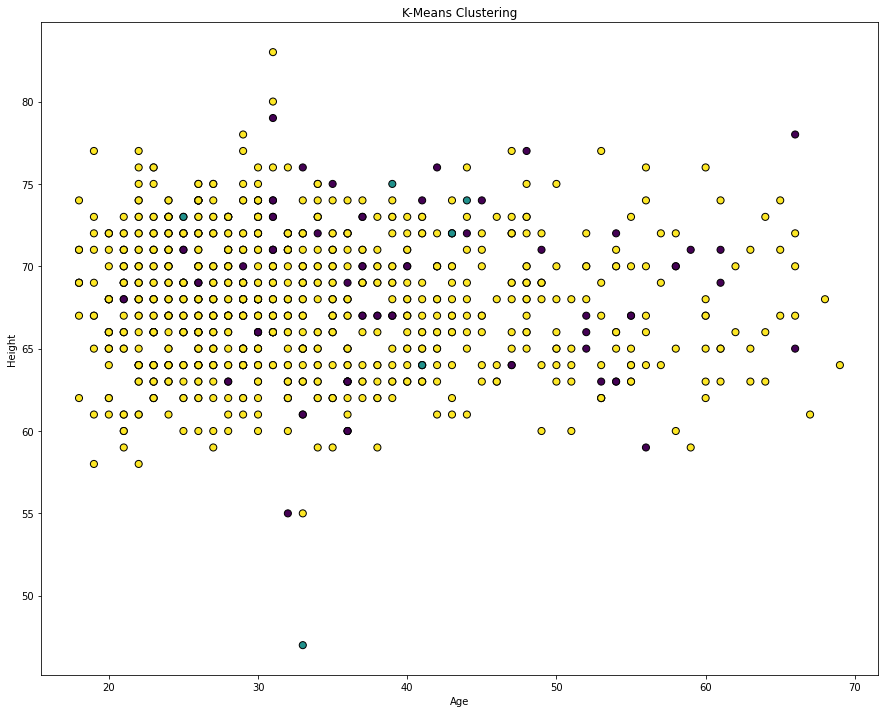

[0 2 2 ... 2 2 2]
 - - - - - - - - - - - - - 
51294    single
8512     single
33456    single
6141     single
6804     single
          ...  
26377    single
4057     single
54911    single
11705    single
8293     single
Name: status, Length: 882, dtype: object


<Figure size 432x288 with 0 Axes>

In [105]:
y = data_clean["status"]
X = data_clean.drop("status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(data_clean.columns)

model = KMeans(n_clusters=3)
model.fit(X_train)
labels = model.predict(X_test)

plt.figure(figsize=(15, 12))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()
plt.clf()

# ACCURACY
print(model.labels_)
print(" - - - - - - - - - - - - - ")
print(y_test)

### SECTION 4
---

In [167]:
essays = data[["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]]
essays = essays.apply(lambda x: x.str.lower())
essays = essays.apply(lambda x: x.str.replace(r"<.*?>", " "))
essays = essays.apply(lambda x: x.str.replace(r"[^\w\s]", " "))
essays = essays.apply(lambda x: x.str.replace(r"\n", " "))
essays = essays.apply(lambda x: x.str.replace(r"\s+", " "))
essays = essays.apply(lambda x: x.str.strip())
essays_tokenized = essays.apply(lambda x: x.str.split())


def merge_essays_precessed(n):
    stop_words = set(stopwords.words("english"))
    essays = essays_tokenized.iloc[:, n]
    merged = []
    for essay in essays:
        for word in essay:
            merged.append(word)
    merged = [word for word in merged if word not in stop_words]
    return merged

essay0 = merge_essays_precessed(0)
essay0_most_frequent_words = Counter(essay0).most_common()
print(essay0_most_frequent_words[:10])

# this isn't working: read the docs
def most_similar_words(word, n):
    word_vector = model.wv[word]
    similarities = model.wv.most_similar(positive=[word_vector], topn=n)
    return similarities




[('love', 4372), ('like', 3888), ('life', 2795), ('people', 2402), ('time', 2017), ('good', 1900), ('things', 1854), ('new', 1843), ('interests', 1641), ('also', 1533)]
